In [27]:
import streamlit as st
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('athlete_events.csv')
region_df = pd.read_csv('noc_regions.csv')

In [3]:
df.head()

ID                      Name Sex   Age  Height  Weight            Team   
0   1                 A Dijiang   M  24.0   180.0    80.0           China  \
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport   
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball  \
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's Football   NaN  
3       Tug-Of-War Men's Tug-Of-War  Gold  
4  Speed Skating Women's 500 metres   NaN

In [ ]:
df.tail()

In [ ]:
df.shape

Filtering only Summer Values

In [4]:
df = df[df['Season'] == 'Summer']

In [ ]:
df.head()

In [ ]:
region_df.tail()

We will merge the data set for country name

In [5]:
df = df.merge(region_df, on = 'NOC', how = 'left') # left join - but for left join 'notes' col will also be joined

In [ ]:
df.tail()

In [6]:
df['region'].unique().shape

(206,)

In [ ]:
df['region'].unique() # this contains border issues and also contains nan values

In [ ]:
df.isnull().sum() 
# this shows no of missing values corresponding col
# some noc can't covert to a specific region

In [ ]:
df.duplicated().sum() # shows duplicate sum

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

In [ ]:
df.shape

In [9]:
df['Medal'].value_counts()

Medal
Gold      11456
Bronze    11409
Silver    11212
Name: count, dtype: int64

In [10]:
# splitting the medal col into 3 cols - Gold, Bronze, Silver
pd.get_dummies(df['Medal'], dtype = int)

Bronze  Gold  Silver
0            0     0       0
1            0     0       0
2            0     0       0
3            0     1       0
4            0     0       0
...        ...   ...     ...
222547       0     0       0
222548       0     0       0
222549       0     0       0
222550       0     0       0
222551       0     0       0

[221167 rows x 3 columns]

In [11]:
df.shape # the number of rows matches but the col doesn't match

(221167, 17)

In [12]:
df = pd.concat([df, pd.get_dummies(df['Medal'], dtype = int)], axis = 1)
# this adds Gold, Bronze, Silver col to the data frame

In [13]:
df

ID                                Name Sex   Age  Height  Weight   
0            1                           A Dijiang   M  24.0   180.0    80.0  \
1            2                            A Lamusi   M  23.0   170.0    60.0   
2            3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
...        ...                                 ...  ..   ...     ...     ...   
222547  135565            Fernando scar Zylberberg   M  27.0   168.0    76.0   
222548  135566          James Francis "Jim" Zylker   M  21.0   175.0    75.0   
222549  135567        Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
222550  135567        Aleksandr Viktorovich Zyuzin   M  28.0   183.0    72.0   
222551  135568              Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                  Team  NOC        Games  Year  Season            City   
0                China  CHN  1992 Summer  1992  Summer       Barcelona  \
1                China  CHN  2012 Summer  2012  Summer          London   
2              Denmark  DEN  1920 Summer  1920  Summer       Antwerpen   
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer           Paris   
4          Netherlands  NED  1932 Summer  1932  Summer     Los Angeles   
...                ...  ...          ...   ...     ...             ...   
222547       Argentina  ARG  2004 Summer  2004  Summer          Athina   
222548   United States  USA  1972 Summer  1972  Summer          Munich   
222549          Russia  RUS  2000 Summer  2000  Summer          Sydney   
222550          Russia  RUS  2004 Summer  2004  Summer          Athina   
222551         Belarus  BLR  2016 Summer  2016  Summer  Rio de Janeiro   

             Sport                                   Event Medal       region   
0       Basketball             Basketball Men's Basketball   NaN        China  \
1             Judo            Judo Men's Extra-Lightweight   NaN        China   
2         Football                 Football Men's Football   NaN      Denmark   
3       Tug-Of-War             Tug-Of-War Men's Tug-Of-War  Gold      Denmark   
4        Athletics            Athletics Women's 100 metres   NaN  Netherlands   
...            ...                                     ...   ...          ...   
222547      Hockey                     Hockey Men's Hockey   NaN    Argentina   
222548    Football                 Football Men's Football   NaN          USA   
222549      Rowing  Rowing Men's Lightweight Coxless Fours   NaN       Russia   
222550      Rowing  Rowing Men's Lightweight Coxless Fours   NaN       Russia   
222551  Basketball           Basketball Women's Basketball   NaN      Belarus   

       notes  Bronze  Gold  Silver  
0        NaN       0     0       0  
1        NaN       0     0       0  
2        NaN       0     0       0  
3        NaN       0     1       0  
4        NaN       0     0       0  
...      ...     ...   ...     ...  
222547   NaN       0     0       0  
222548   NaN       0     0       0  
222549   NaN       0     0       0  
222550   NaN       0     0       0  
222551   NaN       0     0       0  

[221167 rows x 20 columns]

In [14]:
df.groupby('NOC').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold',ascending=False).reset_index()
# this data is wrong (check wikipedia) & that's where the doubt should come

NOC  Gold  Silver  Bronze
0    USA  2472    1333    1197
1    URS   832     635     596
2    GBR   635     729     620
3    GER   592     538     649
4    ITA   518     474     454
..   ...   ...     ...     ...
225  AHO     0       1       0
226  LBR     0       0       0
227  LCA     0       0       0
228  LES     0       0       0
229  LBA     0       0       0

[230 rows x 4 columns]

In [22]:
df[(df['NOC'] == 'IND') & (df['Medal'] == 'Gold')]

ID                    Name Sex   Age  Height  Weight   Team  NOC   
4186      2699             Shaukat Ali   M  30.0     NaN     NaN  India  IND  \
4190      2703        Syed Mushtaq Ali   M  22.0   165.0    61.0  India  IND   
4460      2864     Richard James Allen   M  25.0   172.0     NaN  India  IND   
4461      2864     Richard James Allen   M  30.0   172.0     NaN  India  IND   
4462      2864     Richard James Allen   M  34.0   172.0     NaN  India  IND   
...        ...                     ...  ..   ...     ...     ...    ...  ...   
191759  117232      Dung Dung Sylvanus   M  31.0   160.0    62.0  India  IND   
193964  118553  Carlyle Carrol Tapsell   M  23.0   182.0     NaN  India  IND   
193965  118553  Carlyle Carrol Tapsell   M  27.0   182.0     NaN  India  IND   
205949  125560         Max "Maxie" Vaz   M   NaN     NaN     NaN  India  IND   
219336  133554    Sayed Muhammad Yusuf   M   NaN     NaN     NaN  India  IND   

              Games  Year  Season         City   Sport                Event   
4186    1928 Summer  1928  Summer    Amsterdam  Hockey  Hockey Men's Hockey  \
4190    1964 Summer  1964  Summer        Tokyo  Hockey  Hockey Men's Hockey   
4460    1928 Summer  1928  Summer    Amsterdam  Hockey  Hockey Men's Hockey   
4461    1932 Summer  1932  Summer  Los Angeles  Hockey  Hockey Men's Hockey   
4462    1936 Summer  1936  Summer       Berlin  Hockey  Hockey Men's Hockey   
...             ...   ...     ...          ...     ...                  ...   
191759  1980 Summer  1980  Summer       Moskva  Hockey  Hockey Men's Hockey   
193964  1932 Summer  1932  Summer  Los Angeles  Hockey  Hockey Men's Hockey   
193965  1936 Summer  1936  Summer       Berlin  Hockey  Hockey Men's Hockey   
205949  1948 Summer  1948  Summer       London  Hockey  Hockey Men's Hockey   
219336  1928 Summer  1928  Summer    Amsterdam  Hockey  Hockey Men's Hockey   

       Medal region notes  Bronze  Gold  Silver  
4186    Gold  India   NaN       0     1       0  
4190    Gold  India   NaN       0     1       0  
4460    Gold  India   NaN       0     1       0  
4461    Gold  India   NaN       0     1       0  
4462    Gold  India   NaN       0     1       0  
...      ...    ...   ...     ...   ...     ...  
191759  Gold  India   NaN       0     1       0  
193964  Gold  India   NaN       0     1       0  
193965  Gold  India   NaN       0     1       0  
205949  Gold  India   NaN       0     1       0  
219336  Gold  India   NaN       0     1       0  

[131 rows x 20 columns]

The problem which is detected by the above col: Like, in hockey there are 11 players and this is a team event it is counting 11 gold per head which is wrong. To solve this problem, we need to remove duplicate on the basis of Team, NOC, Games, Year, City altogether.
where all the values are same then we drop that col

In [15]:
medal_tally = df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year','City','Sport','Event','Medal'])

In [16]:
# Now testing the previous code
medal_tally = medal_tally.groupby('NOC').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold',ascending=False).reset_index()

In [17]:
medal_tally['total'] = medal_tally['Gold'] + medal_tally['Silver'] + medal_tally['Bronze']

In [21]:
medal_tally

NOC  Gold  Silver  Bronze  total
0    USA  1035     802     708   2545
1    URS   394     317     294   1005
2    GBR   278     317     300    895
3    GER   235     261     283    779
4    FRA   234     256     287    777
..   ...   ...     ...     ...    ...
225  AHO     0       1       0      1
226  LBR     0       0       0      0
227  LCA     0       0       0      0
228  LES     0       0       0      0
229  LBA     0       0       0      0

[230 rows x 5 columns]

In [23]:
years = df['Year'].unique().tolist()

In [24]:
years.sort()
years.insert(0, 'Overall')

In [25]:
years

['Overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [29]:
country = np.unique(df['region'].dropna().values).tolist()

In [30]:
country.sort()

In [31]:
country.insert(0,'Overall')

In [32]:
country

['Overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

In [33]:
def fetch_medal_tally(year, country):
    medal_df = df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'])
    flag = 0
    if year == 'Overall' and country == 'Overall':
        temp_df = medal_df
    if year == 'Overall' and country != 'Overall':
        flag = 1
        temp_df = medal_df[medal_df['region'] == country]
    if year != 'Overall' and country == 'Overall':
        temp_df = medal_df[medal_df['Year'] == year]
    if year != 'Overall' and country != 'Overall':
        temp_df = medal_df[(medal_df['Year'] == year) & (medal_df['region'] == country)]

    if flag == 1:
        x = temp_df.groupby('Year').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Year').reset_index()
    else:
        x = temp_df.groupby('region').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False).reset_index()

    x['total'] = x['Gold'] + x['Silver'] + x['Bronze']

    x['Gold'] = x['Gold'].astype('int')
    x['Silver'] = x['Silver'].astype('int')
    x['Bronze'] = x['Bronze'].astype('int')
    x['total'] = x['total'].astype('int')

    return x

In [ ]:
#fetch_medal_tally(year='Overall', country='Overall')

In [34]:
# checking the function is working or not 
fetch_medal_tally(year=2016, country='India')

region  Gold  Silver  Bronze  total
0  India     0       1       1      2

#### Overall Analysis

- No. of editions
- No. of cities
- No. of events/sports
- No. of athletes
- participating nations

In [35]:
df.head(2)

ID       Name Sex   Age  Height  Weight   Team  NOC        Games  Year   
0   1  A Dijiang   M  24.0   180.0    80.0  China  CHN  1992 Summer  1992  \
1   2   A Lamusi   M  23.0   170.0    60.0  China  CHN  2012 Summer  2012   

   Season       City       Sport                         Event Medal region   
0  Summer  Barcelona  Basketball   Basketball Men's Basketball   NaN  China  \
1  Summer     London        Judo  Judo Men's Extra-Lightweight   NaN  China   

  notes  Bronze  Gold  Silver  
0   NaN       0     0       0  
1   NaN       0     0       0

In [36]:
df['Year'].unique().shape[0] - 1
# -1 to not to count 1906 game because it is deprecated as Olympic Game

28

In [37]:
df['City'].unique().shape[0]

23

In [38]:
df['Sport'].unique().shape[0]

52

In [39]:
df['Event'].unique().shape[0]

651

In [40]:
df['Name'].unique().shape[0]

116122

In [41]:
df['region'].unique().shape[0]

206

Over the years how many participating nations are attented Olympics:

In [42]:
df.drop_duplicates(['Year', 'region'])['Year'].value_counts().reset_index().sort_values('Year')

Year  count
28  1896     12
22  1900     31
27  1904     14
26  1906     20
25  1908     22
24  1912     29
23  1920     29
21  1924     45
20  1928     46
19  1932     47
18  1936     49
17  1948     59
16  1952     67
15  1956     71
13  1960     83
11  1964     93
10  1968    111
9   1972    120
12  1976     91
14  1980     80
8   1984    139
7   1988    156
6   1992    168
5   1996    196
4   2000    199
3   2004    200
2   2008    202
1   2012    203
0   2016    204

In [43]:
nations_over_time = df.drop_duplicates(['Year', 'region'])['Year'].value_counts().reset_index().sort_values('Year')

In [44]:
nations_over_time.rename(columns={'Year':'Edition', 'count':'No of Countries'}, inplace=True)

In [45]:
nations_over_time

Edition  No of Countries
28     1896               12
22     1900               31
27     1904               14
26     1906               20
25     1908               22
24     1912               29
23     1920               29
21     1924               45
20     1928               46
19     1932               47
18     1936               49
17     1948               59
16     1952               67
15     1956               71
13     1960               83
11     1964               93
10     1968              111
9      1972              120
12     1976               91
14     1980               80
8      1984              139
7      1988              156
6      1992              168
5      1996              196
4      2000              199
3      2004              200
2      2008              202
1      2012              203
0      2016              204

In [117]:
import plotly.express as px

In [118]:
fig = px.line(nations_over_time, x="Edition", y="No of Countries")
              
fig.show()
# the drop of 1980 because some countries boycotted the Olympic (Country: Moscow) due to the atatck Russia did on Afganistan

In [56]:
df.drop_duplicates(['Year', 'Event'])['Year'].value_counts().reset_index().sort_values('Year')

Year  count
28  1896     43
26  1900     90
25  1904     95
27  1906     74
23  1908    109
24  1912    107
14  1920    158
20  1924    131
22  1928    122
21  1932    131
18  1936    150
15  1948    153
19  1952    149
16  1956    151
17  1960    150
13  1964    163
12  1968    172
11  1972    193
10  1976    198
9   1980    203
8   1984    221
7   1988    237
6   1992    257
5   1996    271
4   2000    300
3   2004    301
1   2008    302
2   2012    302
0   2016    306

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
x = df.drop_duplicates(['Year','Sport','Event'])

<Axes: xlabel='Year', ylabel='Sport'>

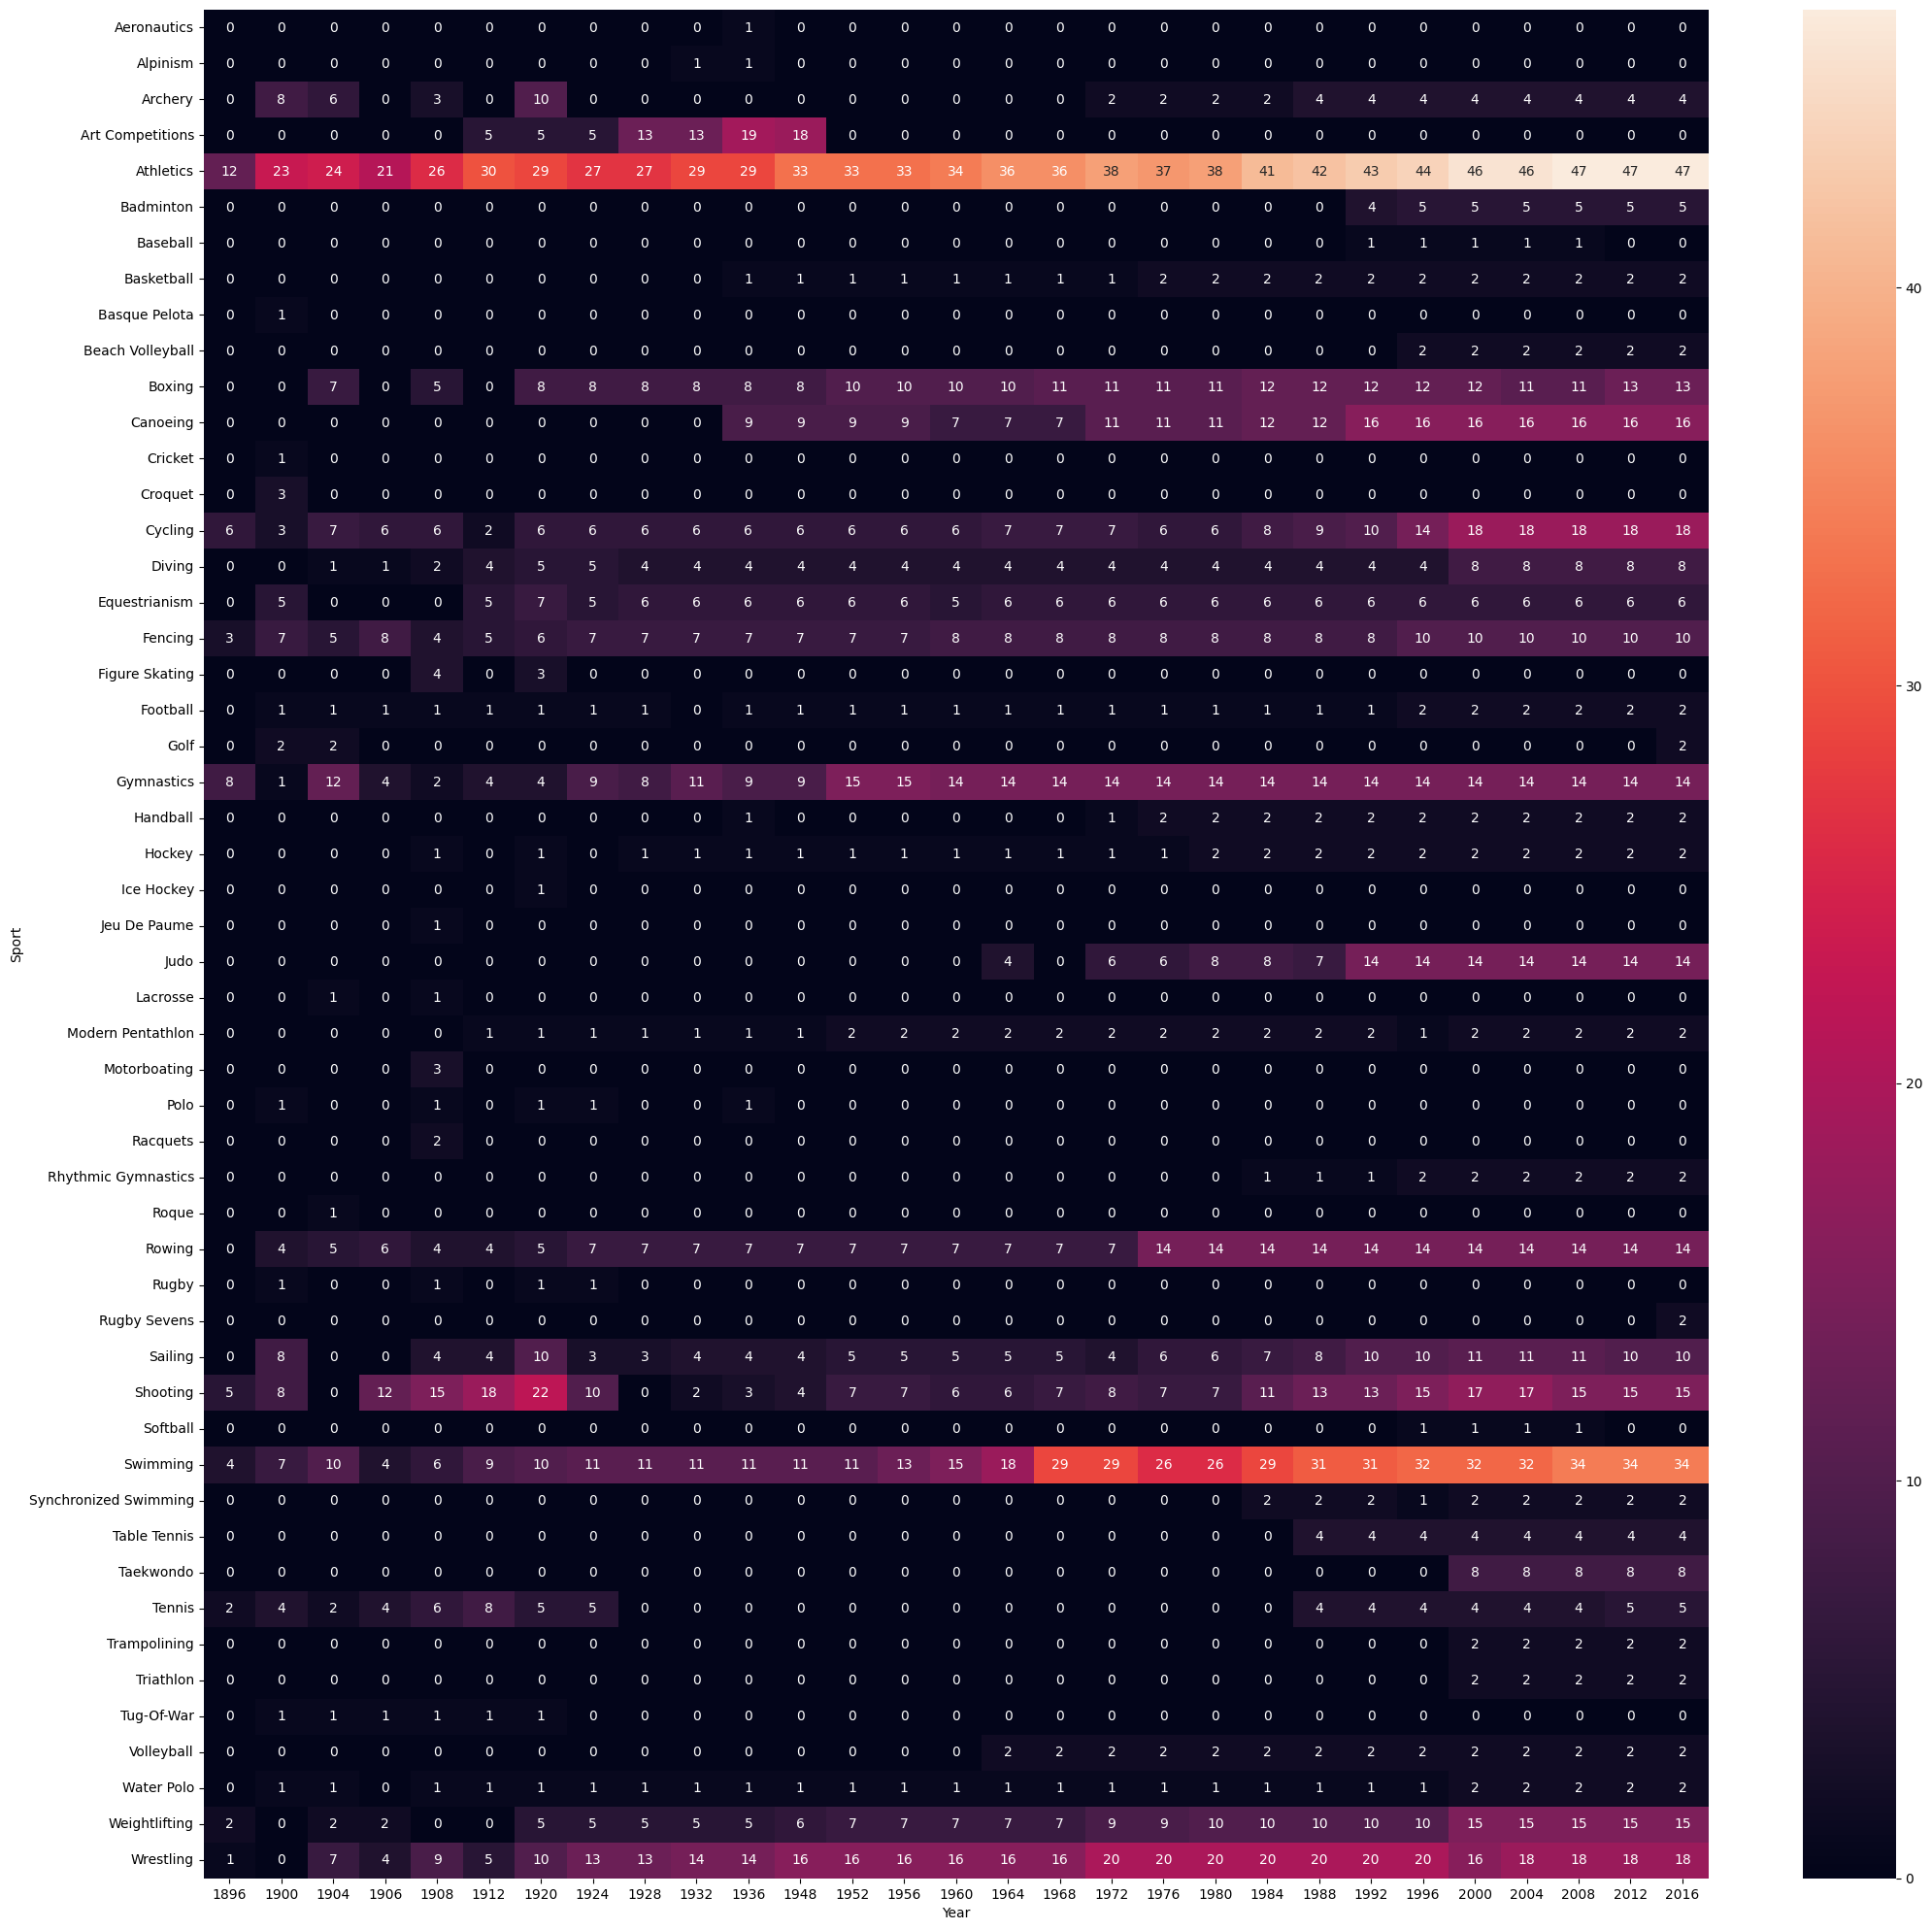

In [59]:
plt.figure(figsize=(25,25))
sns.heatmap(x.pivot_table(index='Sport',columns='Year',values='Event',aggfunc='count').fillna(0).astype('int'),annot=True)

In [60]:
def most_successful(df,sport):
    temp_df = df.dropna(subset=['Medal'])
    if sport != 'Overall':
        temp_df = temp_df[temp_df['Sport'] == sport]
    
    x = temp_df['Name'].value_counts().reset_index().head(15)
    x.rename(columns={'Name': 'index', 'count': 'Name'}, inplace=True)
    x = x.merge(df, left_on='index', right_on='Name', how='left')[['index', 'Name_x', 'Sport','region']].drop_duplicates('index')
    x.rename(columns={'index': 'Name', 'Name_x': 'Medals'}, inplace=True)
    return x

In [61]:
most_successful(df,'Overall')

Name  Medals       Sport   
0                            Michael Fred Phelps, II      28    Swimming  \
30                Larysa Semenivna Latynina (Diriy-)      18  Gymnastics   
49                      Nikolay Yefimovich Andrianov      15  Gymnastics   
73                       Borys Anfiyanovych Shakhlin      13  Gymnastics   
97                                       Takashi Ono      13  Gymnastics   
130                              Edoardo Mangiarotti      13     Fencing   
144             Dara Grace Torres (-Hoffman, -Minas)      12    Swimming   
157                          Aleksey Yuryevich Nemov      12  Gymnastics   
178  Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)      12    Swimming   
195                           Birgit Fischer-Schmidt      12    Canoeing   
208                               Ryan Steven Lochte      12    Swimming   
222                             Paavo Johannes Nurmi      12   Athletics   
234                                       Sawao Kato      12  Gymnastics   
258                    Natalie Anne Coughlin (-Hall)      12    Swimming   
270                   Matthew Nicholas "Matt" Biondi      11    Swimming   

      region  
0        USA  
30    Russia  
49    Russia  
73    Russia  
97     Japan  
130    Italy  
144      USA  
157   Russia  
178      USA  
195  Germany  
208      USA  
222  Finland  
234    Japan  
258      USA  
270      USA

### Country wise
- Countrywise emdal tally per year(line plot)
- what countries are good at heatmap
- most successful Athletes(Top 10)

In [70]:
temp_df = df.dropna(subset=['Medal'])

In [71]:
temp_df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'],inplace=True)

C:\Users\mohit\AppData\Local\Temp\ipykernel_22408\2044258740.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [72]:
new_df = temp_df[temp_df['region'] == 'USA']
final_df = new_df.groupby('Year').count()['Medal'].reset_index()

In [73]:
fig = px.line(final_df, x="Year", y="Medal")
fig.show()

<Axes: xlabel='Year', ylabel='Sport'>

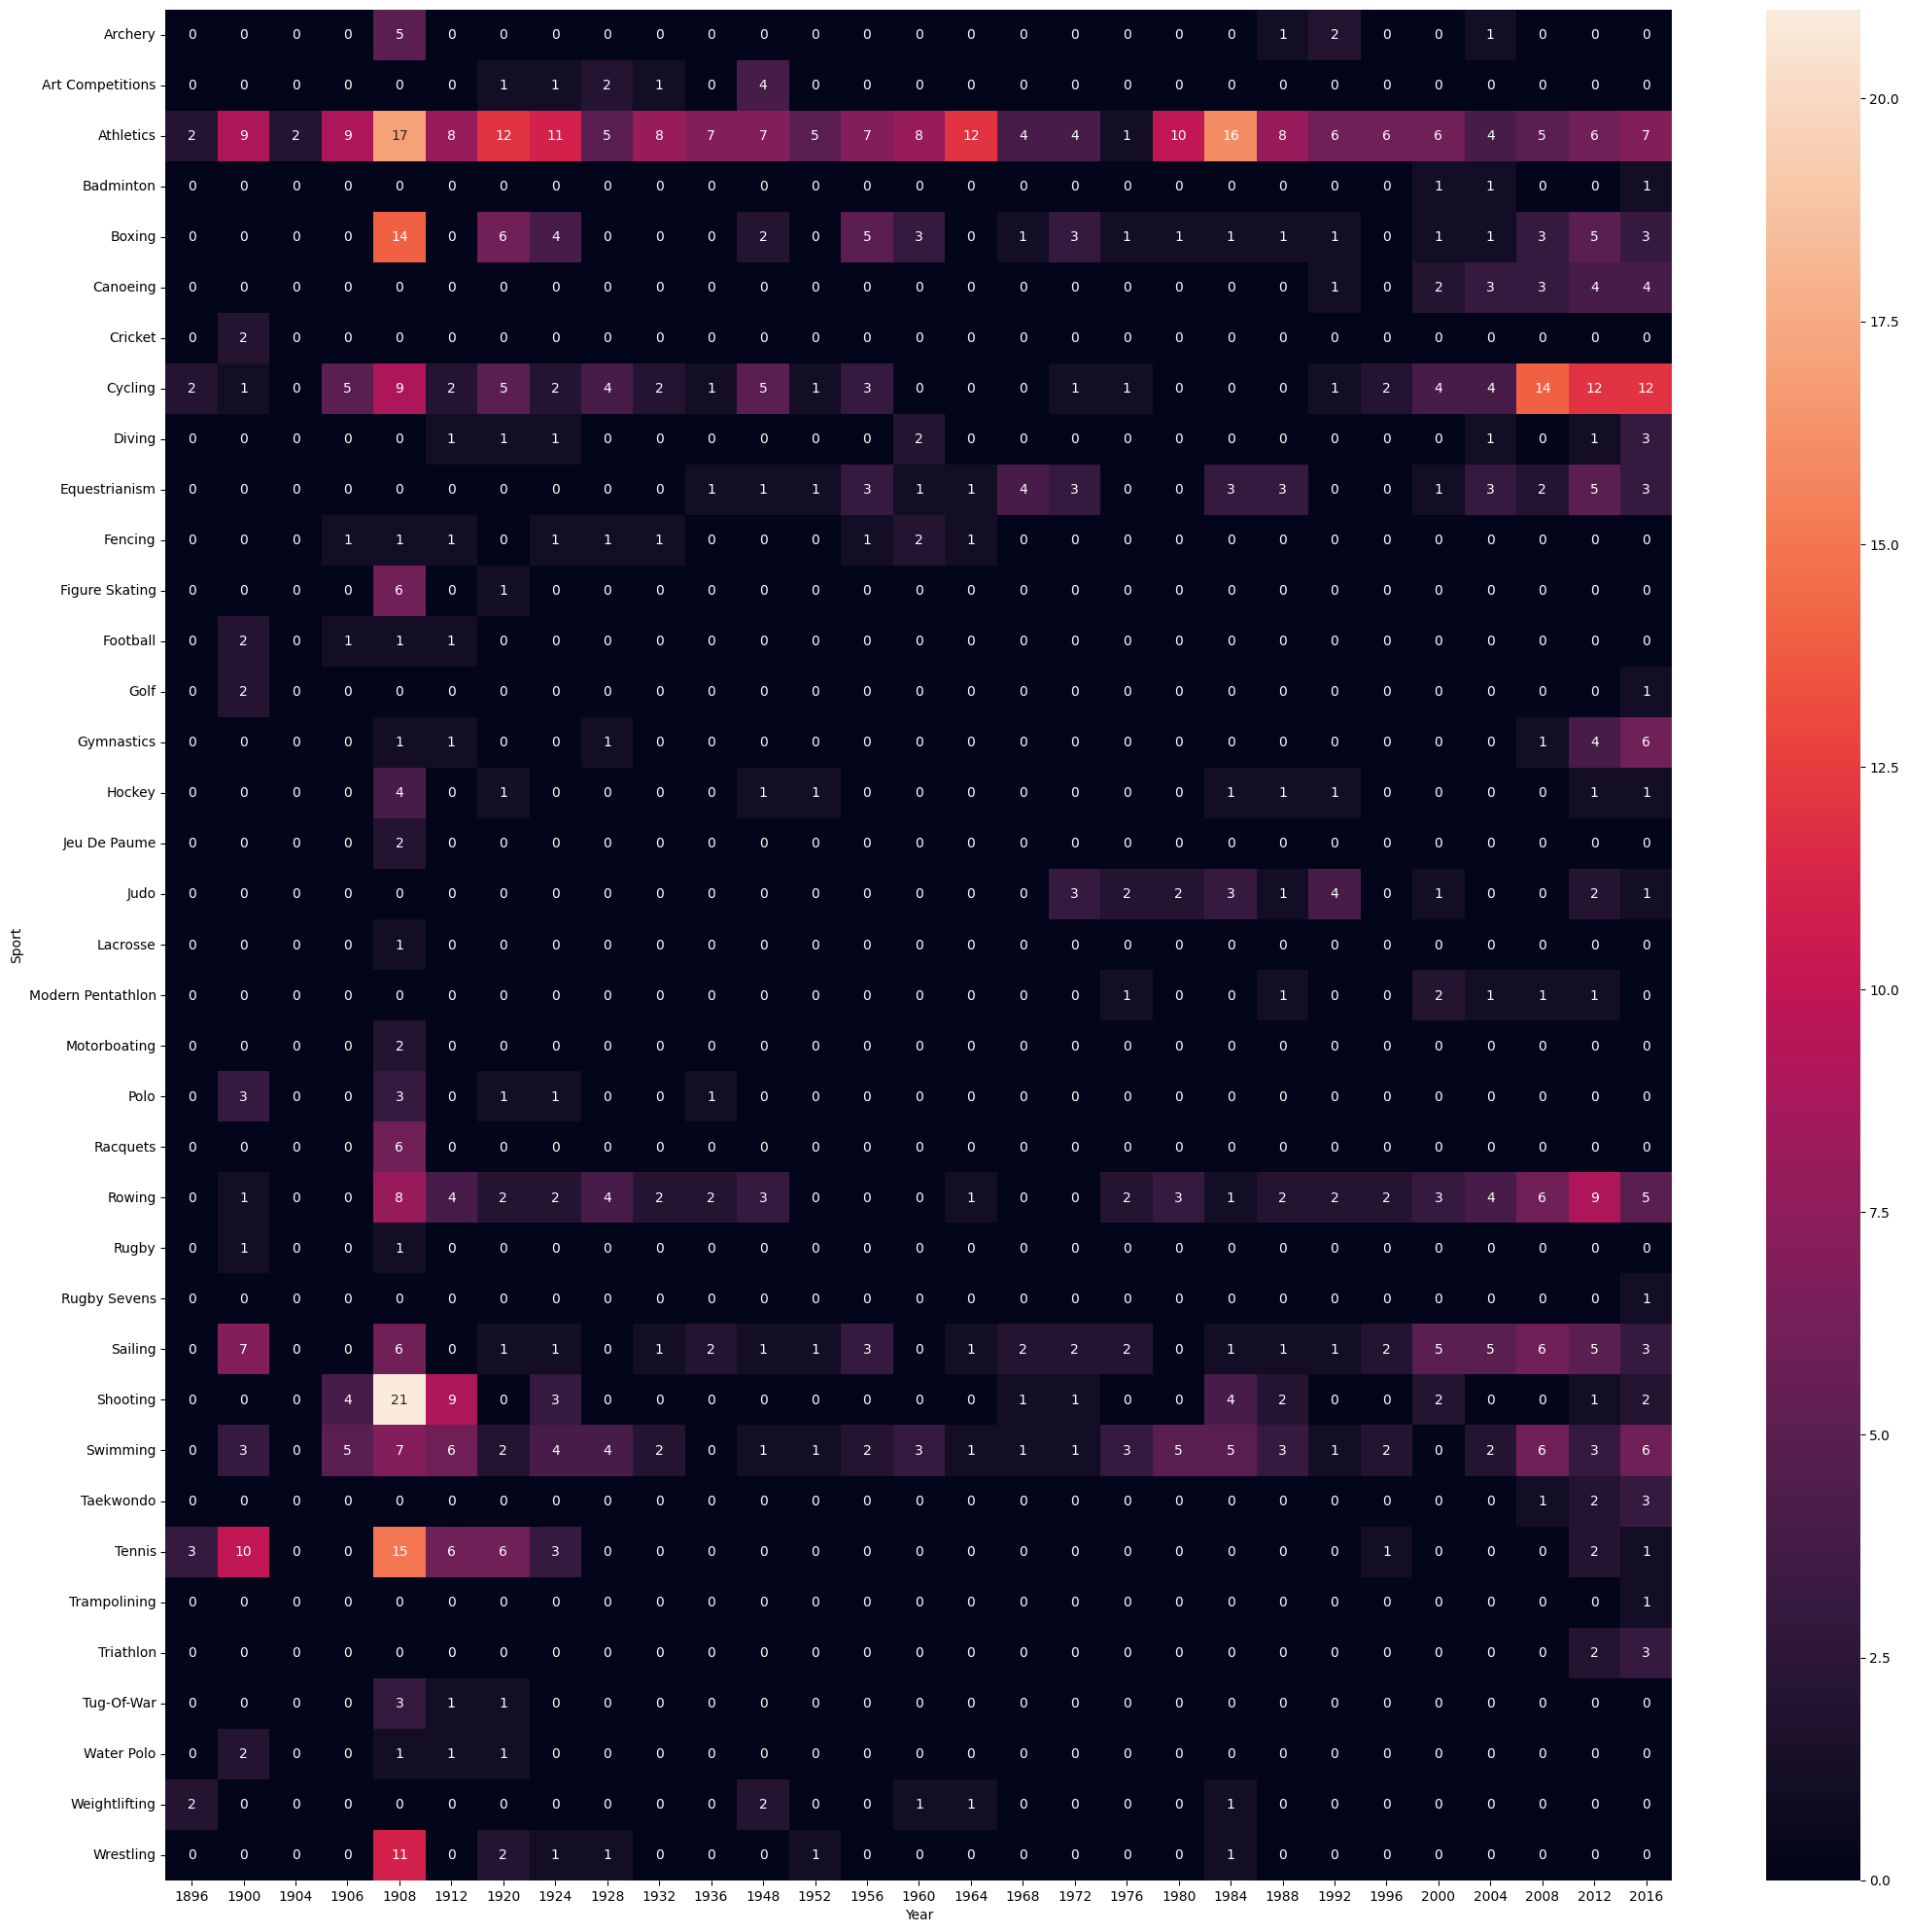

In [74]:
new_df = temp_df[temp_df['region'] == 'UK']
plt.figure(figsize=(25,25))
sns.heatmap(new_df.pivot_table(index='Sport', columns='Year',values='Medal',aggfunc='count').fillna(0),annot=True)

In [75]:
def most_successful_countrywise(df,country):
    temp_df = df.dropna(subset=['Medal'])
    temp_df = temp_df[temp_df['region'] == country]
    
    x = temp_df['Name'].value_counts().reset_index().head(15)
    x.rename(columns={'Name': 'index', 'count': 'Name'}, inplace=True)
    x = x.merge(df, left_on='index', right_on='Name', how='left')[['index', 'Name_x', 'Sport']].drop_duplicates('index')
    x.rename(columns={'index': 'Name', 'Name_x': 'Medals'}, inplace=True)
    return x

In [76]:
most_successful_countrywise(df, 'India')

Name  Medals      Sport
0           Udham Singh Kular       4     Hockey
4      Leslie Walter Claudius       4     Hockey
8       Shankar Pillay Laxman       3     Hockey
11        Ranganathan Francis       3     Hockey
14        Richard James Allen       3     Hockey
17               Balbir Singh       3     Hockey
20     Harbinder Singh Chimni       3     Hockey
23  Balbir Singh Dosanjh, Sr.       3     Hockey
26  Victor John "V. J." Peter       3     Hockey
29           Dhyan Chand Bais       3     Hockey
32            Prithipal Singh       3     Hockey
35       Randhir Singh Gentle       3     Hockey
38            Roop Singh Bais       2     Hockey
40           Hari Pal Kaushik       2     Hockey
42       Sushil Kumar Solanki       2  Wrestling

Athlete-wise Analysis

In [77]:
import scipy
import plotly.figure_factory as ff

In [78]:
athlete_df = df.drop_duplicates(subset=['Name', 'region'])
x1 = athlete_df['Age'].dropna()
x2 = athlete_df[athlete_df['Medal'] == 'Gold']['Age'].dropna()
x3 = athlete_df[athlete_df['Medal'] == 'Silver']['Age'].dropna()
x4 = athlete_df[athlete_df['Medal'] == 'Bronze']['Age'].dropna()

fig = ff.create_distplot([x1, x2, x3, x4], ['Overall Age', 'Gold Medalist', 'Silver Medalist', 'Bronze Medalist'], show_hist=False, show_rug=False)
fig.update_layout(autosize=False, width=1000, height=700)
fig.show()

Histogram

In [112]:
import plotly.graph_objects as go

athlete_df = df.drop_duplicates(subset=['Name', 'region'])
x1 = athlete_df['Age'].dropna()
x2 = athlete_df[athlete_df['Medal'] == 'Gold']['Age'].dropna()
x3 = athlete_df[athlete_df['Medal'] == 'Silver']['Age'].dropna()
x4 = athlete_df[athlete_df['Medal'] == 'Bronze']['Age'].dropna()

fig = go.Figure()
fig.add_trace(go.Histogram(x=x1, name='Overall Age'))
fig.add_trace(go.Histogram(x=x2, name='Gold Medalist'))
fig.add_trace(go.Histogram(x=x3, name='Silver Medalist'))
fig.add_trace(go.Histogram(x=x4, name='Bronze Medalist'))

fig.update_layout(barmode='overlay')
fig.show()

In [80]:
athlete_df['Medal'].fillna('No Medal', inplace=True)

<Axes: xlabel='Weight', ylabel='Height'>

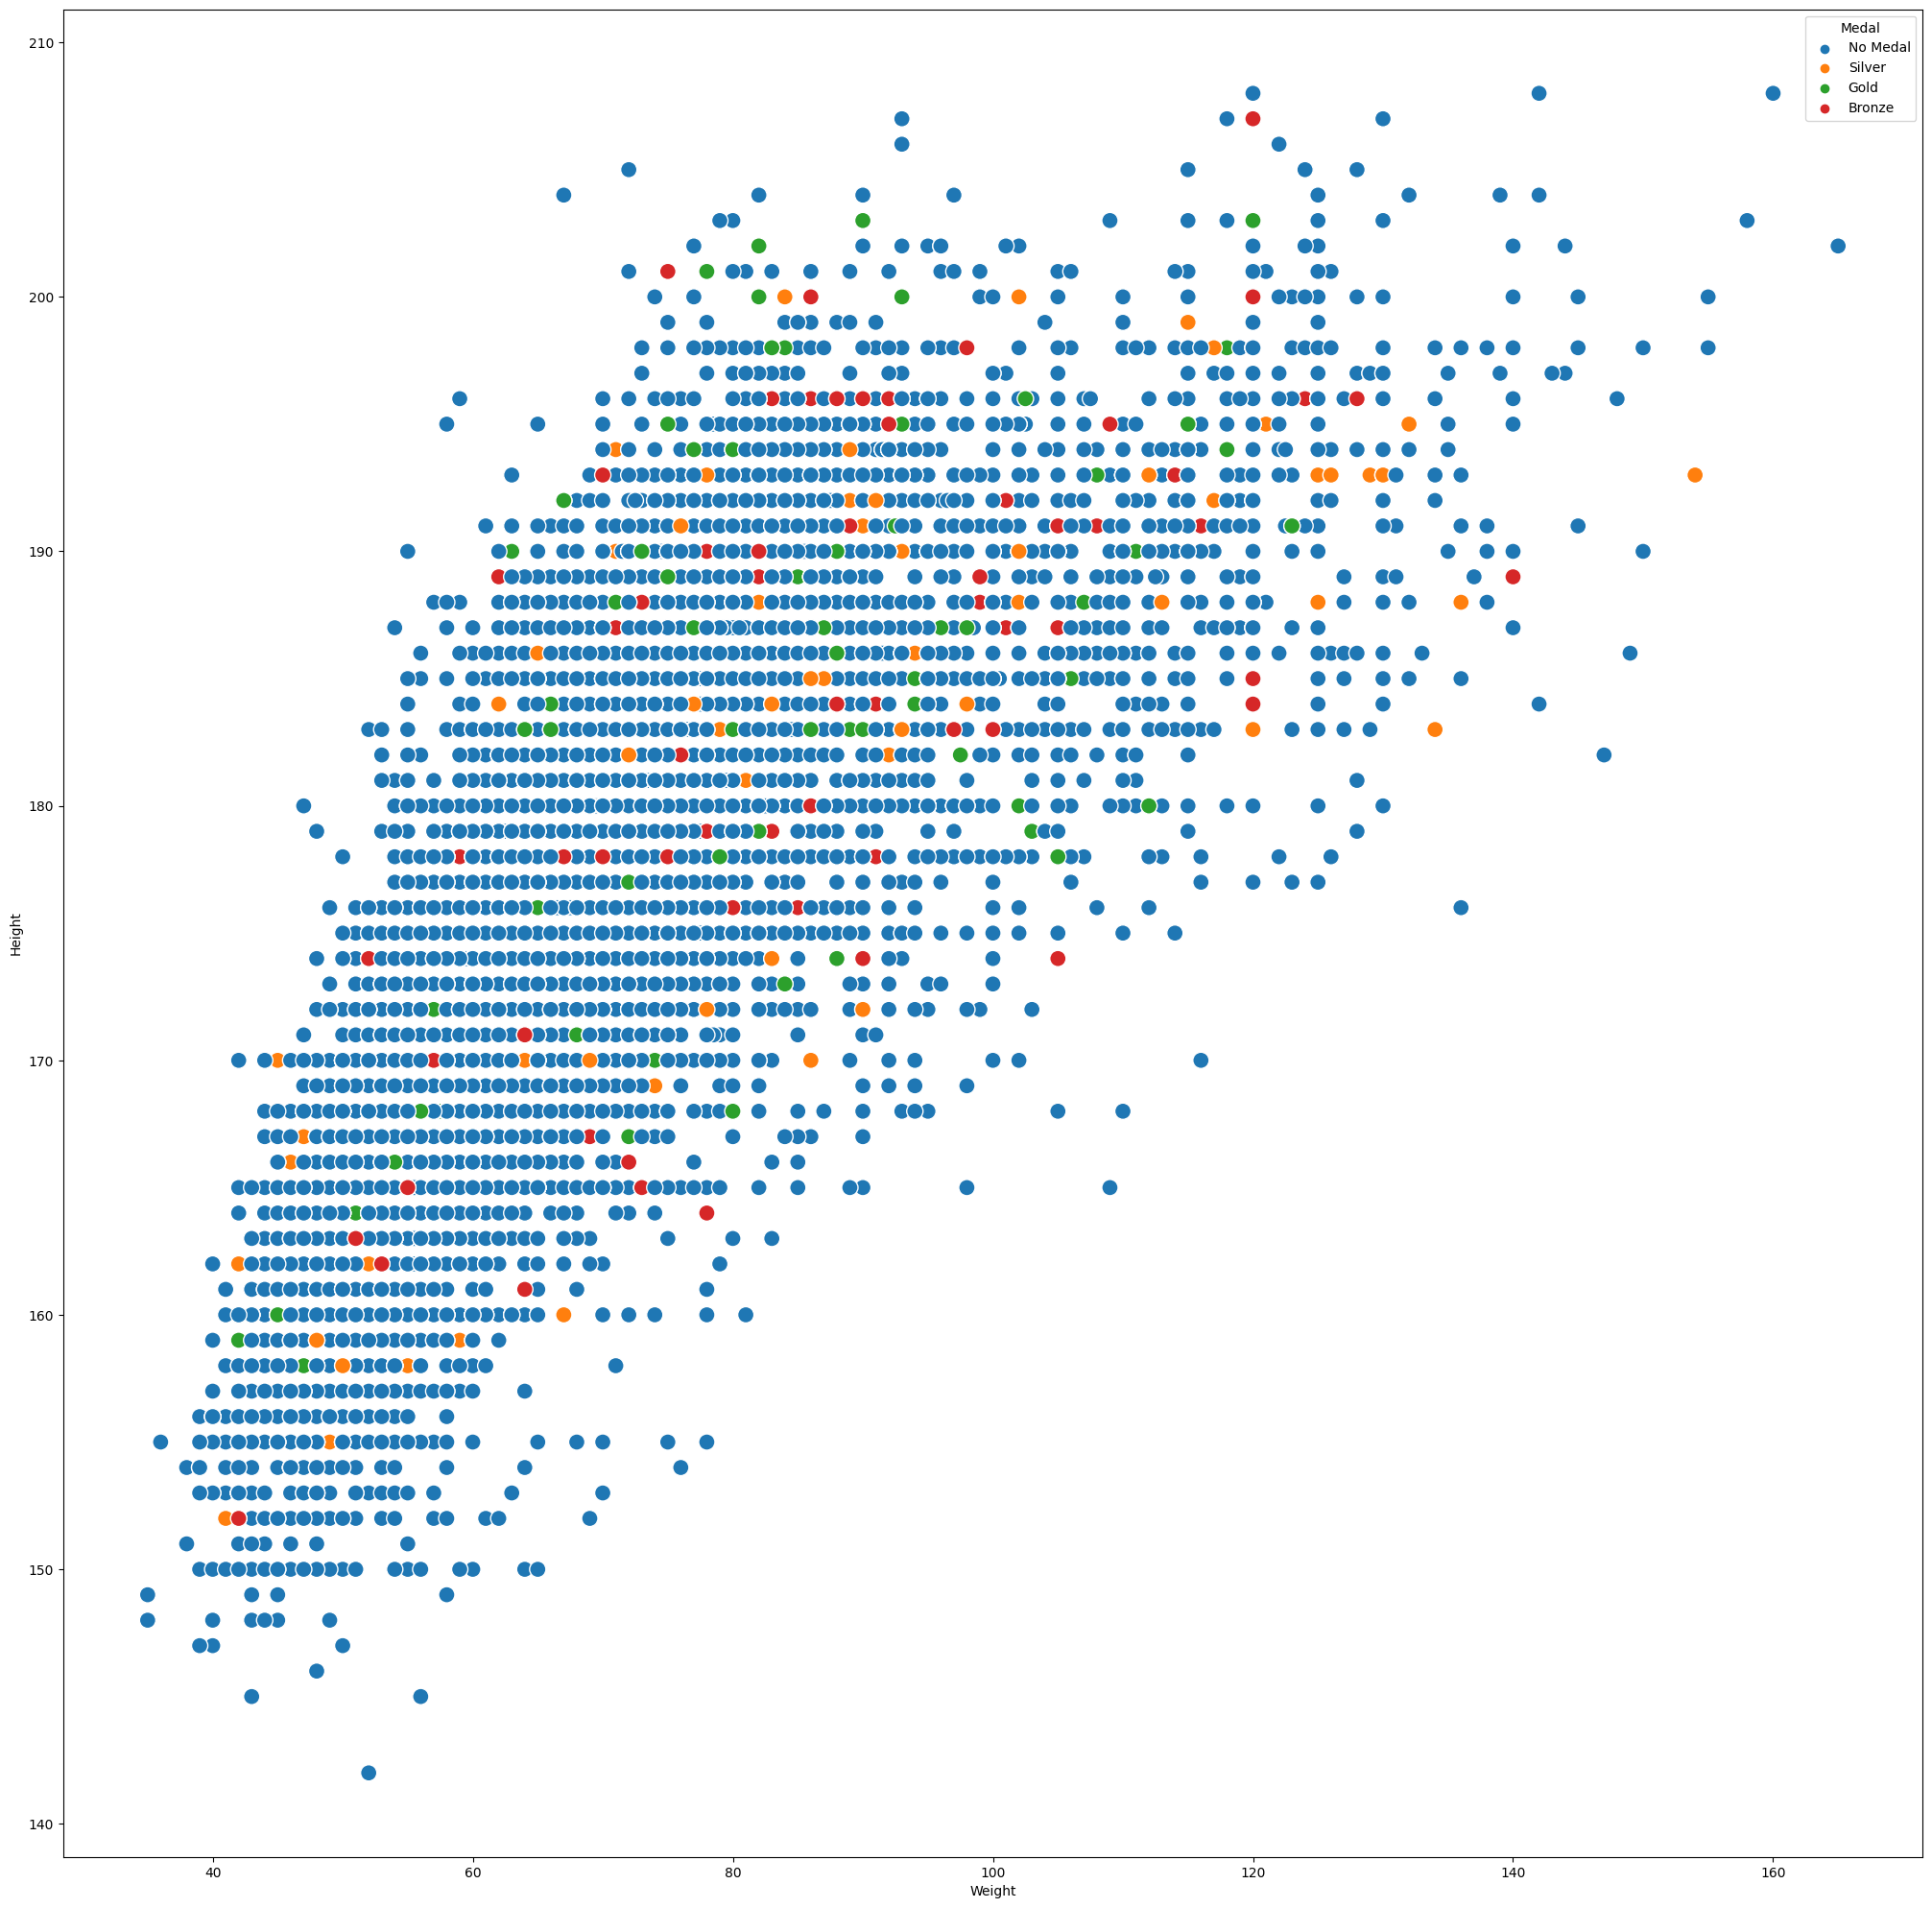

In [100]:
plt.figure(figsize=(25,25))
temp_df = athlete_df[athlete_df['Sport'] == 'Athletics']
sns.scatterplot(x=temp_df['Weight'], y=temp_df['Height'],hue =temp_df['Medal'],s=150)

<Axes: xlabel='Weight', ylabel='Height'>

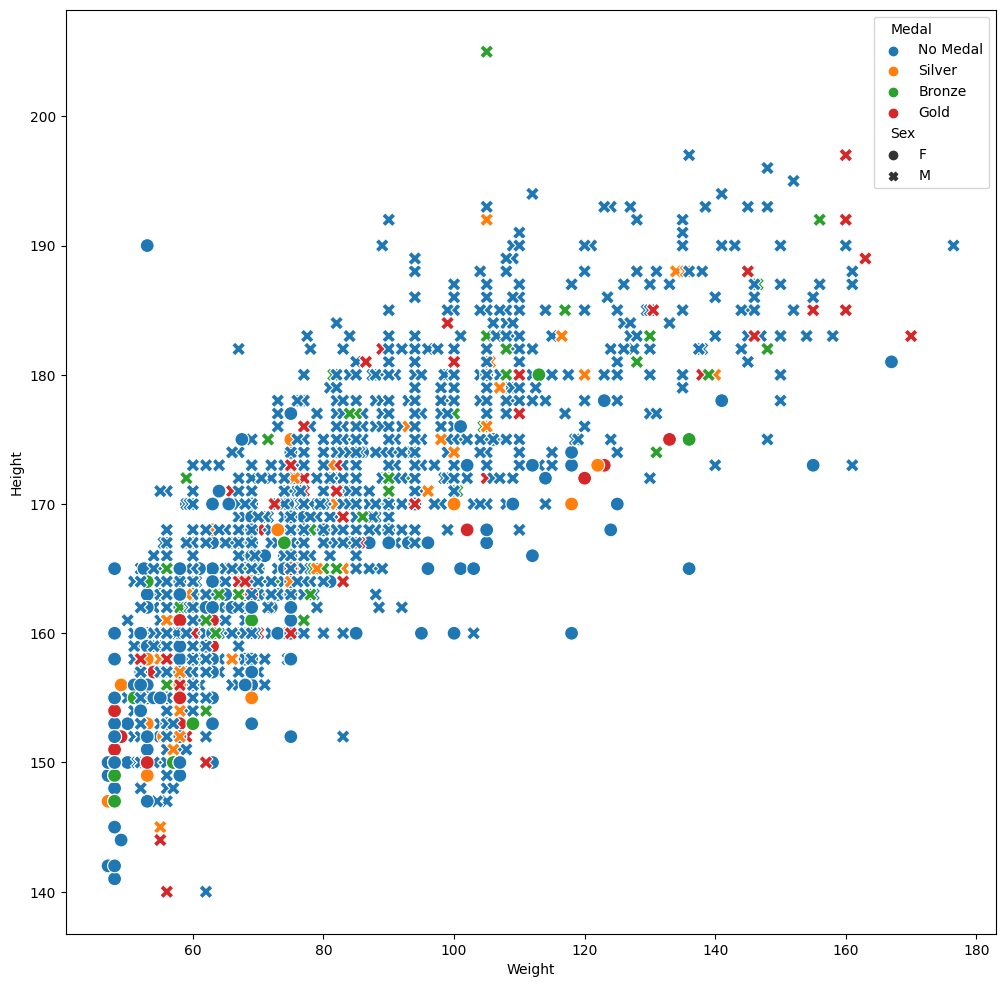

In [97]:
plt.figure(figsize=(12,12))
temp_df = athlete_df[athlete_df['Sport'] == 'Weightlifting']
sns.scatterplot(x=temp_df['Weight'], y=temp_df['Height'],hue =temp_df['Medal'],style=temp_df['Sex'],s=100)

In [101]:
men = athlete_df[athlete_df['Sex'] == 'M'].groupby('Year').count()['Name'].reset_index()
women = athlete_df[athlete_df['Sex'] == 'F'].groupby('Year').count()['Name'].reset_index()

In [103]:
final = men.merge(women,on='Year',how ='left')
final.rename(columns={'Name_x':'Male','Name_y':'Female'}, inplace=True)

In [107]:
final.fillna(0,inplace=True)

In [111]:
fig = px.line(final, x='Year', y=['Male','Female'])
fig.show()